## Q1 Parabola

### Original Data

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

X_and_Y = np.load('./hw4-q1-parabola.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
print(X.shape, Y.shape)

(300,) (300,)


### 1.1 Parabola Estimation with L2 Norm 

In [4]:
one_a = np.ones(shape = Y.shape)[..., None]
one_b2 = one_a.reshape(300,1)
X6 = X**2
X_squared = X6.reshape(300,1)
X_shape = X.reshape(300,1)
Xs = np.hstack((one_b2, X_shape, X_squared))
w0,w1,w2 = inv(Xs.transpose().dot(Xs)).dot(Xs.transpose().dot(Y))

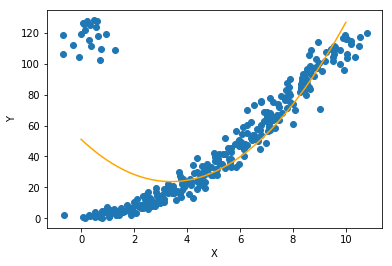

In [7]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 1.2 Parabola Estimation with L1 Norm (Gradient Descent)

In [9]:
# 1.2A - Sign Derivative
def calc_gradient_L1(Xs,W,Y):
    return np.sign(Xs.dot(W) - Y).T.dot(Xs).T

current_W = (0.0, 4.0, 1.0)
learning_rate = 0.000001
precision = 0.00001
max_iterations = 300000
previous_stepsize = (1.0, 1.0, 1.0)
iterations = 0
while max(previous_stepsize) > precision and iterations < max_iterations:
    previous_W = current_W
    current_W = previous_W - learning_rate *(calc_gradient_L1(Xs, previous_W, Y))
    previous_stepsize = abs(current_W - previous_W)
    iterations += 1

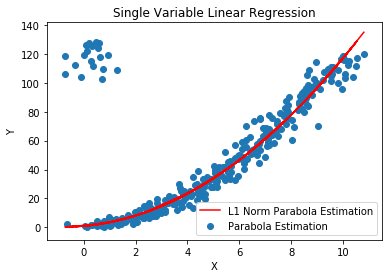

In [13]:
# TODO: Plot the scatter graph of data and estimaated plane
# TODO: Plot the a scatter graph of data.
# x_parabola = (W[0] + dot(W[1], Xs[1]) + dot(w2,Xs[2]))
f, ax = plt.subplots()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('L1 Norm')
Y_line = current_W[0] + current_W[1] * X + current_W[2] * (X**2)
plt.plot(X, Y_line, 'r', label='L1 Norm Parabola Estimation')
ax.scatter(X, Y, label='Parabola Estimation')
plt.title("Single Variable Linear Regression")
plt.legend(loc = 'lower right')
plt.show()

### 1.3 Parabola Estimation with L1 and L2 Norm (Gradient Descent)

In [14]:
def calc_gradient_L2(Xs,W,Y):
    X_t = np.transpose(Xs)
    gradient = 2*np.dot(X_t, (np.dot(Xs, W) - Y))
    return gradient

# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
# W = np.matrix(np.zeros((3,1)))
# Y = Y.reshape(-1, 1)

print(X.shape, Y.shape, W.shape)

#while True:
def gradient_L2_and_L1(X,W,Y):
    gradient = (alpha * (2*X.T.dot(X).dot(W) - 2*X.T.dot(Y))) + ((1 - alpha) * np.dot)
    for i in range(300000):
        grad = calc_gradient_L2(X, W, Y)
        W_new = W - 0.000001 * grad
        if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
            print(i)
            break
        W = W_new
    return W

for i in range(3):
    prev_stepsize = (1.0,1.0,1.0)
    iters = 0
# w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

NameError: name 'W' is not defined

In [ ]:
def calc_gradient_L2(Xs,W,Y):
    X_t = np.transpose(Xs)
    gradient = 2*np.dot(X_t, (np.dot(Xs, W) - Y))
    return gradient
    
def calc_gradient_L1_and_L2(alpha, Xs, W, Y):
    L2 = calc_gradient_L2(Xs * alpha, W, Y)
    L1 = calc_gradient_L1((1 - alpha) * Xs, W, Y)
    gradient = L1 + L2
    return gradient

# initial_W = (0.0, 4.0, 1.0)
# current_W_with_L1_and_L2 = [initial_W, initial_W, initial_W]
# learning_rate = 0.000001
# precision = 0.00001
# max_iterations = 300000
# alpha = (0.3, 0.5, 0.6)
# for i in range(3):
#     previous_stepsize = (1.0, 1.0, 1.0)
#     iterations = 0
#     while max(previous_stepsize) > precision and iterations < max_iterations:
#         previous_W = current_W_with_L1_and_L2[i]
#         current_W_with_L1_and_L2[i] = previous_W - learning_rate *(calc_gradient_L1_and_L2(alpha[i], Xs, previous_W, Y))
#         previous_stepsize = abs(current_W_with_L1_and_L2[i] - previous_W)
#         iterations += 1
    
# print(iterations)
# print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(current_W_with_L1_and_L2[i][0], 
#                                                   current_W_with_L1_and_L2[i][1], 
#                                                   current_W_with_L1_and_L2[i][2])) 

### 1.4 Comparison (Visualization)

In [ ]:
# # f, axs = plt.subplot(1,5, figsize=(15,6))
# ax.scatter(X,Y, label='spots')
# ax.plot(X, current_W, color = 'r', label = 'Gradient Descent L1')
# ax.plot(X, W, color = 'b', label = 'Closed Form L2') )
# ax.plot(X, current_W_with_L1_and_L2[0], color = 'g', label = 'Gradient Descent L1 + L2 alpha = 0.3') )
# ax.plot(X, current_W_with_L1_and_L2[1], color = 'o', label = 'Gradient Descent L1 + L2 alpha = 0.5') )
# ax.plot(X, current_W_with_L1_and_L2[2], color = 'p', label = 'Gradient Descent L1 + L2 alpha = 0.6') )
# plt.title("L1 and L2 Norm")
# plt.legend(loc = 'lower right')
# plt.show()

W1_new, W2_new, W3_new = current_W_with_L1_and_L2[i][0], current_W_with_L1_and_L2[i][1], current_W_with_L1_and_L2[i][2]
print(W1_new, W2_new, W3_new)
xs = np.linspace(-1, 11, 100)
W_new = current_W_with_L1_and_L2
plt.subplots(figsize=(8,6))
plt.scatter(X, Y, s=3)

for w, a in zip(W_new, alpha):
    Y = W1_new + W2_new*xs + W3_new*(xs ** 2)
    print(Y.shape)
    plt.plot(xs, Y)
#     plt.plot(Xs, Y, label=f'Alpha: {a}')

plt.legend();

Try to explain the reason to:
1. the position of each curve compared to the position of valid data points and outliers 
    - The curve has been derived repeatedly in each excercise in order to minimize the loss function in 
        gradient descent. 
2. difference between L2 curve and L1 curve 
        - The L2 curve takes into account outliers and the L1 curve does not. We can see that
        given the parabola drawn for L2
3. similarity among L2 curve and L1 + L2 curves.
    - L1 + L2 are the same as the L1 curve ,but they approach the shape of the L2 curve as alpha increases

## Q4 Logistic Regression

### Original Data

In [15]:
import numpy as np
from tqdm import *
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# ---- set the figure size
plt.rcParams['figure.figsize'] = 8,8

# ---- load the data Q3_data.txt
file_path = 'Q4_data.txt'

data = np.genfromtxt(file_path,dtype="f8,f8,f8,f8,S20",
delimiter=',',names=['x1','x2','x3','x4','class'])

# ---- split the data points into the training set and test set
train_data = np.concatenate((data[15:50],data[65:]))
test_data = np.concatenate((data[:15],data[50:65]))
X_train = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in train_data])
X_test = np.vstack([np.array((1,x[0],x[1],x[2],x[3])) for x in test_data])
num_train = len(X_train)
num_test = len(X_test)

print("number of training data is "+str(num_train))
print("number of testing data is "+str(num_test))

# ---- convert the class names into categorical labels.
le = LabelEncoder()
le.fit(data['class'])
y_train = le.transform(train_data['class']).reshape(num_train,1)
y_test = le.transform(test_data['class']).reshape(num_test,1)

# ---- initialize the weights and bias to 0
# ---- we absorb the bias into the weights
w = np.zeros((5,1))
n_iter = 1000
alpha = 0.01
train_err = []
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

number of training data is 70
number of testing data is 30
(70, 5) (30, 5) (70, 1) (30, 1)


### 4.2 Training with Training curve.

gradient descent - train a binary classifier based on logistic regression. Vectorize 

In [16]:
def sigmoid(x):
    if x >= 0:
        z = np.exp(-x)
        return 1/ (1+z)
    else:
        z = np.exp(x)
        return z/(1+z)

def logistic_positive_prob(Xi, W):
    WX = np.dot(W, Xi)
    return sigmoid(WX)

def logistic_derivative_per_datapoint(Yi, Xi, W, j):
    derivative_loss = -(Yi - logistic_positive_prob(Xi, W))*Xi[j]
    return derivative_loss

def logistic_partial_derivative(y, x, a, j):
    loss_der = 0
    for i in range(len(y)):
        temp_loss_der = logistic_derivative_per_datapoint(y[i], x[i], a, j)
        loss_der += temp_loss_der 
    return loss_der

def compute_logistic_gradient(a, y, x):
    partial_der_of_a = []
    for j in range(len(a.T)):
        temp_partial = logistic_partial_derivative(y,x,a,j)
        partial_der_of_a.append(temp_partial)
    return np.array(partial_der_of_a)

def gradient_update(a, lr, gradient):
    # What is the current time step
    a_new = a - lr * (gradient.T) 
    return a_new

def gradient_descent_logistic(initial_w, lr, num_iterations, y, x):
    optimal_a = initial_w
    loss_value = [-sum(np.log((1 + np.exp(-(2*y -1)*(x.dot(optimal_a.T))))**-1))]
    for i in range(num_iterations):
        previous_a = optimal_a
        loss_value.append(-sum(np.log((1 + np.exp(-(2*y -1)*(x.dot(optimal_a.T))))**-1)))
        current_gradient = compute_logistic_gradient(previous_a, y, x)
        optimal_a = gradient_update(optimal_a ,lr ,current_gradient)
    return loss_value, optimal_a



new_loss, logit_w = gradient_descent_logistic(w.T, alpha, n_iter, y_train, X_train)
print(logit_w)




[[ -4.62687368  -7.76700795  -7.39403989  11.80790441  10.57065556]]


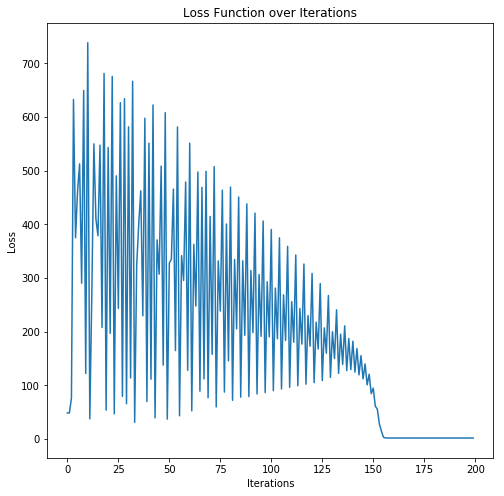

In [17]:
f, ax = plt.subplots()
ax.plot(range(200), new_loss[:200])
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss Function over Iterations')
plt.show()

### 4.3 Decision Boundary (Equation & Plot)

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


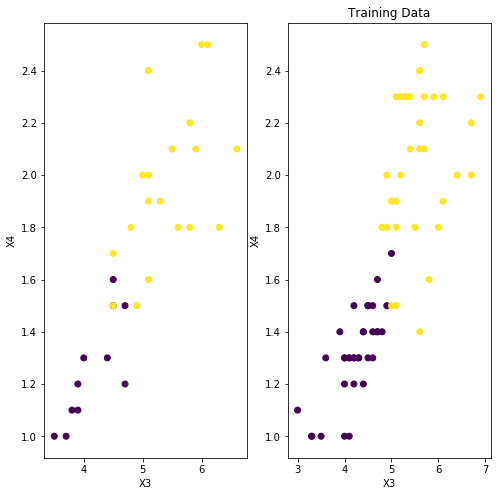

In [18]:
def decision_boundary(Xi,W):
    decision = (1 / (1 + np.exp(-(np.dot(Xi,W.T)))))
    decision_array = []
    if decision >= 0.5:
        return 1
    else:
        return 0
    
y_hat_train = []
y_hat_test = []
for xi in X_test:
    y_hat_test.append(decision_boundary(xi, logit_w))
    
for xi in X_train:
    y_hat_train.append(decision_boundary(xi, logit_w))
    
print(y_hat_test)

f, ax = plt.subplots(1,2)
ax[0].scatter(X_test[:,3], X_test[:,4], c=np.array(y_hat_test) )
ax[0].set_xlabel('X3')
ax[0].set_ylabel('X4')
ax[1].set_title('Test Data')
ax[1].scatter(X_train[:,3], X_train[:,4], c=np.array(y_hat_train) )
ax[1].set_xlabel('X3')
ax[1].set_ylabel('X4')
ax[1].set_title('Training Data')
plt.show()

### 4.4 Test (Report Accuracy)

In [21]:
final_scores = np.dot(X_test, logit_w.T)
predictions = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((predictions == y_test).sum().astype(float) / len(predictions)))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()